In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('data/instagram_reach.csv')
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


AttributeError: 'Series' object has no attribute 'split'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [16]:
import re
import string
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopword.add('will')

def WordCloudPlot(column):
    col = data[column]
    textCloud = ''
    
    for mem in col:
        textCloud = textCloud + str(mem)
        
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.style.use('seaborn-whitegrid')
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

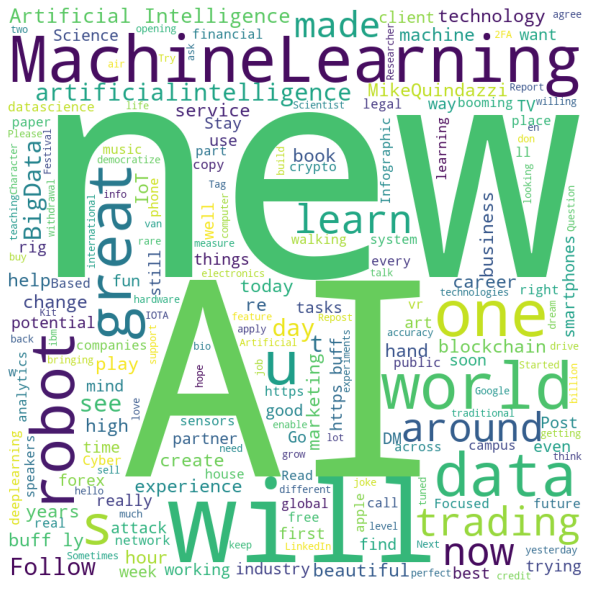

In [17]:
WordCloudPlot('Caption')

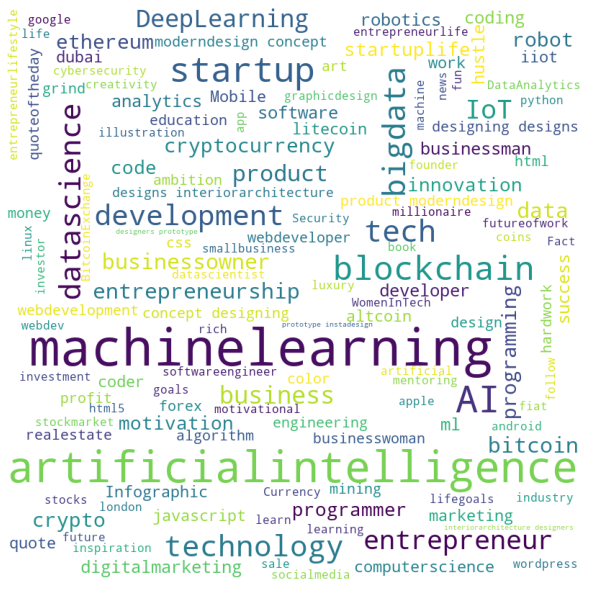

In [18]:
WordCloudPlot('Hashtags')

In [21]:
def plotData(features):
    
    plt.figure(figsize=(12,12))
    count = 1
    
    for mem in features:
        plt.subplot(1,2,count)
        plt.style.use('seaborn-whitegrid')
        plt.grid(True)
        sbn.regplot(data=data, x=mem, y='Likes', color='green')
        count+=1
        
    plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

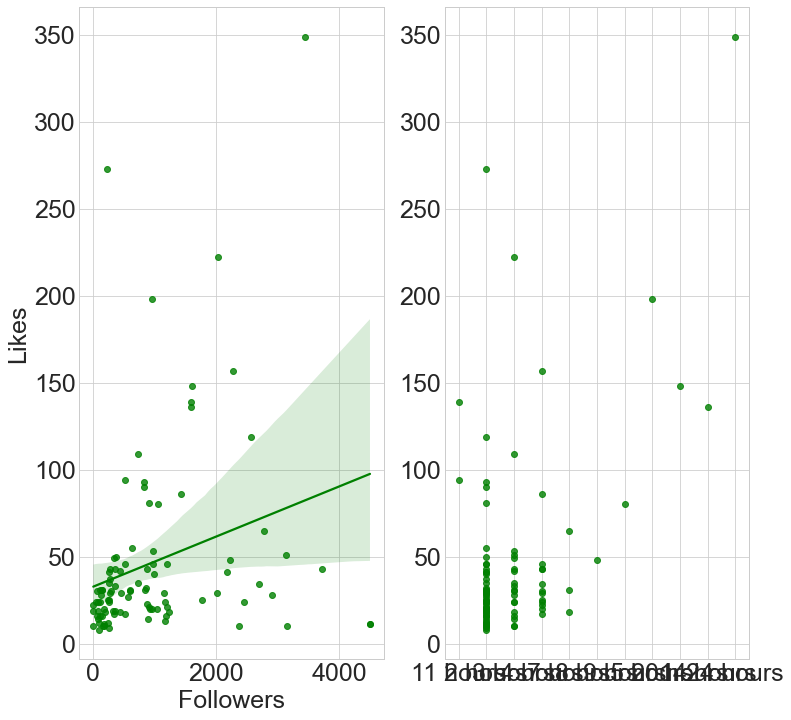

In [22]:
plotData(['Followers', 'Time since posted'])

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = np.array(data[['Followers', 'Time since posted']], dtype = 'float32')
y = np.array(data['Likes'], dtype = 'float32')
max_of_y = max(y)

y = y/max_of_y

x_train, x_test, y_train, y_test = train_test_split(x,y)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

from sklearn.ensemble import GradientBoostingRegressora
gbr = GradientBoostingRegressor()
gbr.fit(x_train, x_test)

ValueError: could not convert string to float: '11 hours'